# 处理文本数据

`
创建于20230313 创建者Stephen CUI
`

In [64]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

import spacy
import nltk
import mglearn

## 用字符串表示的数据类型

## 示例应用：电影评论的情感分析

In [2]:
reviews_train = load_files('Data/train/')
text_train, y_train = reviews_train.data, reviews_train.target
print('type of text_train: {}'.format(type(text_train)))
print('length of text_train: {}'.format(len(text_train)))
print('text_train[1]: \n {}'.format(text_train[1]))

type of text_train: <class 'list'>
length of text_train: 25000
text_train[1]: 
 b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decis

In [3]:
text_train = [doc.replace(b'<br />', b' ') for doc in text_train]
print('Samples per class (training): {}'.format(np.bincount(y_train)))

Samples per class (training): [12500 12500]


In [4]:
reviews_test = load_files('Data/test/')
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b'<br />', b' ') for doc in text_test]
print('Samples per class (test): {}'.format(np.bincount(y_test)))
print('length of text test: {}'.format(len(text_test)))

Samples per class (test): [12500 12500]
length of text test: 25000


## 将文本数据表示为词袋

### 将词袋应用于测试数据集

In [32]:
bards_words =["The fool doth think he is wise,", 
              "but the wise man knows himself to be a fool"]

In [8]:
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [9]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))

Vocabulary size: 13
Vocabulary content:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [14]:
bag_of_words = vect.transform(bards_words)
print('bag_of_words: {}'.format(repr(bag_of_words)))

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [13]:
print('Dense representation of bag_of_words:\n{}'.format(
    bag_of_words.toarray()
))

Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


### 将词袋应用于电影评论

In [15]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
X_train

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>

In [24]:
feature_names = vect.get_feature_names_out()
print('Number of features: {}'.format(len(feature_names)))
print('First 20 features: \n{}'.format(feature_names[:20]))
print('Features 20010 to 20030: \n{}'.format(feature_names[20010: 20030]))
print('Every 2000th feature: \n{}'.format(feature_names[::2000]))

Number of features: 74849
First 20 features: 
['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02']
Features 20010 to 20030: 
['dratted' 'draub' 'draught' 'draughts' 'draughtswoman' 'draw' 'drawback'
 'drawbacks' 'drawer' 'drawers' 'drawing' 'drawings' 'drawl' 'drawled'
 'drawling' 'drawn' 'draws' 'draza' 'dre' 'drea']
Every 2000th feature: 
['00' 'aesir' 'aquarian' 'barking' 'blustering' 'bête' 'chicanery'
 'condensing' 'cunning' 'detox' 'draper' 'enshrined' 'favorit' 'freezer'
 'goldman' 'hasan' 'huitieme' 'intelligible' 'kantrowitz' 'lawful' 'maars'
 'megalunged' 'mostey' 'norrland' 'padilla' 'pincher' 'promisingly'
 'receptionist' 'rivals' 'schnaas' 'shunning' 'sparse' 'subset'
 'temptations' 'treatises' 'unproven' 'walkman' 'xylophonist']


In [26]:
scores = cross_val_score(LogisticRegression(max_iter=1_000), X_train, y_train)
round(np.mean(scores), 2)

In [38]:
param_grid = {'C': [.001, .01, .1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=2_000), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=2000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [39]:
print('Best cross-validation score: {:.2f}'.format(grid.best_score_))
print('Best parameters: {}'.format(grid.best_params_))

Best cross-validation score: 0.89
Best parameters: {'C': 0.1}


In [40]:
X_test = vect.transform(text_test)
grid.score(X_test, y_test)

0.87888

In [41]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print('X_train with min_df: {}'.format(repr(X_train)))

X_train with min_df: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [42]:
feature_names = vect.get_feature_names_out()
print('First 50 features: \n{}'.format(feature_names[:50]))
print('Features 20010 to 20030: \n{}'.format(feature_names[20010: 20030]))
print('Every 700th feature: \n{}'.format(feature_names[::700]))

First 50 features: 
['00' '000' '007' '00s' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10'
 '100' '1000' '100th' '101' '102' '103' '104' '105' '107' '108' '10s'
 '10th' '11' '110' '112' '116' '117' '11th' '12' '120' '12th' '13' '135'
 '13th' '14' '140' '14th' '15' '150' '15th' '16' '160' '1600' '16mm' '16s'
 '16th']
Features 20010 to 20030: 
['repentance' 'repercussions' 'repertoire' 'repetition' 'repetitions'
 'repetitious' 'repetitive' 'rephrase' 'replace' 'replaced' 'replacement'
 'replaces' 'replacing' 'replay' 'replayable' 'replayed' 'replaying'
 'replays' 'replete' 'replica']
Every 700th feature: 
['00' 'affections' 'appropriately' 'barbra' 'blurbs' 'butchered' 'cheese'
 'commitment' 'courts' 'deconstructed' 'disgraceful' 'dvds' 'eschews'
 'fell' 'freezer' 'goriest' 'hauser' 'hungary' 'insinuate' 'juggle'
 'leering' 'maelstrom' 'messiah' 'music' 'occasional' 'parking'
 'pleasantville' 'pronunciation' 'recipient' 'reviews' 'sas' 'shea'
 'sneers' 'steiger' 'swastika' 'thrusting'

In [46]:
grid = GridSearchCV(LogisticRegression(max_iter=1_000), param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [47]:
print('Best score-validation score: {:.3f}'.format(grid.best_score_))

Best score-validation score: 0.888


## 停用词

In [49]:
len(ENGLISH_STOP_WORDS)

318

In [52]:
list(ENGLISH_STOP_WORDS)[::10]

['etc',
 'their',
 'found',
 'were',
 'back',
 'go',
 'ever',
 'well',
 'you',
 'beyond',
 'its',
 'here',
 'latterly',
 'least',
 'whereby',
 'she',
 'beside',
 'among',
 'wherever',
 'mine',
 'hundred',
 'twelve',
 'across',
 'in',
 'anyone',
 'or',
 'ourselves',
 'down',
 'however',
 'please',
 'give',
 'am']

In [53]:
vect = CountVectorizer(min_df=5, stop_words='english').fit(text_train)
X_train = vect.transform(text_train)
print('X_train with stop words:\n{}'.format(repr(X_train)))

X_train with stop words:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [55]:
grid = GridSearchCV(LogisticRegression(max_iter=1_000), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print('Best cross-validation score: {:.2f}'.format(grid.best_score_))

Best cross-validation score: 0.88


使用停用词后的网格搜索性能略有下降——不至于担心，但鉴于从 27 000 多个特征中删
除 305 个不太可能对性能或可解释性造成很大影响，所以使用这个列表似乎是不值得的。
固定的列表主要对小型数据集很有帮助，这些数据集可能没有包含足够的信息，模型从数
据本身无法判断出哪些单词是停用词。

作为练习，你可以尝试另一种方法，即通过设置
`CountVectorizer` 的 `max_df` 选项来舍弃出现最频繁的单词，并查看它对特征数量和性能有
什么影响。

In [62]:
vect_practice = CountVectorizer(min_df=5, stop_words='english', max_df=50).fit(text_train)
X_train_practice = vect_practice.transform(text_train)
print('X_train with stop words:\n{}'.format(repr(X_train_practice)))
grid_practice = GridSearchCV(LogisticRegression(max_iter=1_000), param_grid, cv=5, n_jobs=-1)
grid_practice.fit(X_train_practice, y_train)
print('Best cross-validation score: {:.2f}'.format(grid_practice.best_score_))

X_train with stop words:
<25000x20879 sparse matrix of type '<class 'numpy.int64'>'
	with 324302 stored elements in Compressed Sparse Row format>
Best cross-validation score: 0.75


## 用tf-idf缩放数据

In [7]:
pipe = make_pipeline(TfidfVectorizer(min_df=5),
                     LogisticRegression(max_iter=1_000))
param_grid = {'logisticregression__C': [.001, .01, .1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(text_train, y_train)
print('Best cross-validation score: {:.3f}'.format(grid.best_score_))

Best cross-validation score: 0.892


In [24]:
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']
X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis=0).toarray().ravel()
# Returns the indices that would sort an array.
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names_out())
print('Features with lowest tfidf: \n{}'.format(feature_names[sorted_by_tfidf[:20]]))
print('Features with highest tfidf: \n{}'.format(feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf: 
['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
Features with highest tfidf: 
['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


tf-idf 较小的特征要么是在许多文档里都很常用，要么就是很少使用，且仅出现在非常长
的文档中。有趣的是，许多 tf-idf 较大的特征实际上对应的是特定的演出或电影。这些术
语仅出现在这些特定演出或电影的评论中，但往往在这些评论中多次出现。

我们还可以找到逆向文档频率较低的单词，即出现次数很多，因此被认为不那么重要的单
词。

In [26]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print('Features with lowest idf: \n{}'.format(feature_names[sorted_by_idf[:50]]))

Features with lowest idf: 
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very']


正如所料，这些词大多是英语中的停用词，比如 "the" 和 "no"。但有些单词显然是电影评
论特有的，比如 "movie"、"film"、"time"、"story" 等。有趣的是，"good"、"great" 和
"bad" 也属于频繁出现的单词，因此根据 tf-idf 度量也属于“不太相关”的单词，尽管我们
可能认为这些单词对情感分析任务非常重要。

## 研究模型系数

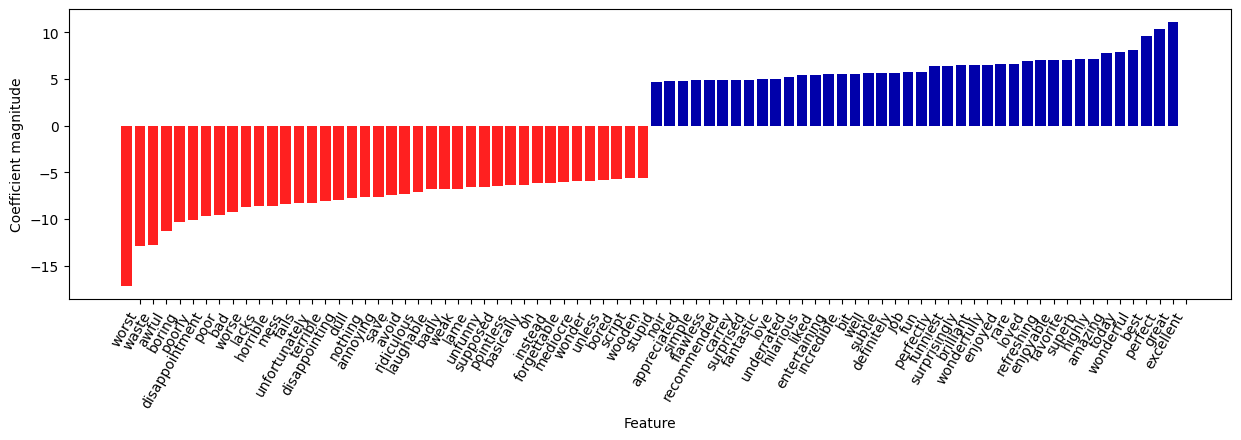

In [30]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps['logisticregression'].coef_,
    feature_names,n_top_features=40
)

## 多个单词的词袋（n元分词）

In [33]:
print('bards_words:\n{}'.format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


默认情况下，为每个长度最小为 1 且最大为 1 的词例序列（或者换句话说，刚好 1 个词
例）创建一个特征——单个词例也被称为一元分词（unigram）：

In [36]:
cv = CountVectorizer(ngram_range=(1, 1,)).fit(bards_words)
print('Vocabulary size: {}'.format(len(cv.vocabulary_)))
print('Vocabulary: \n{}'.format(cv.get_feature_names_out()))

Vocabulary size: 13
Vocabulary: 
['be' 'but' 'doth' 'fool' 'he' 'himself' 'is' 'knows' 'man' 'the' 'think'
 'to' 'wise']


In [38]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print('Vocabulary size: {}'.format(len(cv.vocabulary_)))
print('Vocabulary: \n{}'.format(cv.get_feature_names_out()))

Vocabulary size: 14
Vocabulary: 
['be fool' 'but the' 'doth think' 'fool doth' 'he is' 'himself to'
 'is wise' 'knows himself' 'man knows' 'the fool' 'the wise' 'think he'
 'to be' 'wise man']


使用更长的词例序列通常会得到更多的特征，也会得到更具体的特征。

In [39]:
print('Transformed data (dense): \n{}'.format(cv.transform(bards_words).toarray()))

Transformed data (dense): 
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [40]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print('Vocabulary size: {}'.format(len(cv.vocabulary_)))
print('Vocabulary: \n{}'.format(cv.get_feature_names_out()))

Vocabulary size: 39
Vocabulary: 
['be' 'be fool' 'but' 'but the' 'but the wise' 'doth' 'doth think'
 'doth think he' 'fool' 'fool doth' 'fool doth think' 'he' 'he is'
 'he is wise' 'himself' 'himself to' 'himself to be' 'is' 'is wise'
 'knows' 'knows himself' 'knows himself to' 'man' 'man knows'
 'man knows himself' 'the' 'the fool' 'the fool doth' 'the wise'
 'the wise man' 'think' 'think he' 'think he is' 'to' 'to be' 'to be fool'
 'wise' 'wise man' 'wise man knows']


In [43]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=1_000))
param_grid = {'logisticregression__C': [.001, .01, .1, 1, 10, 100],
              'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.91
Best parameters:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


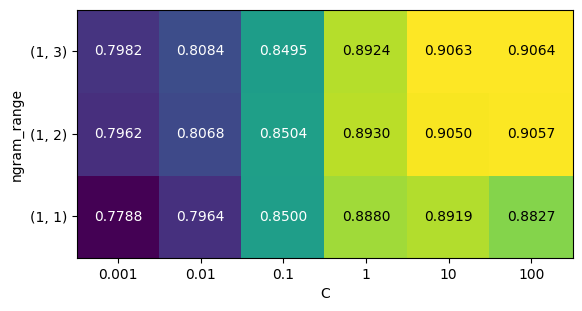

In [46]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
heatmap = mglearn.tools.heatmap(
    scores, xlabel='C', ylabel='ngram_range', fmt='%.4f',
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range']
)

从热图中可以看出，使用二元分词对性能有很大提高，而添加三元分词对精度只有很小贡
献。

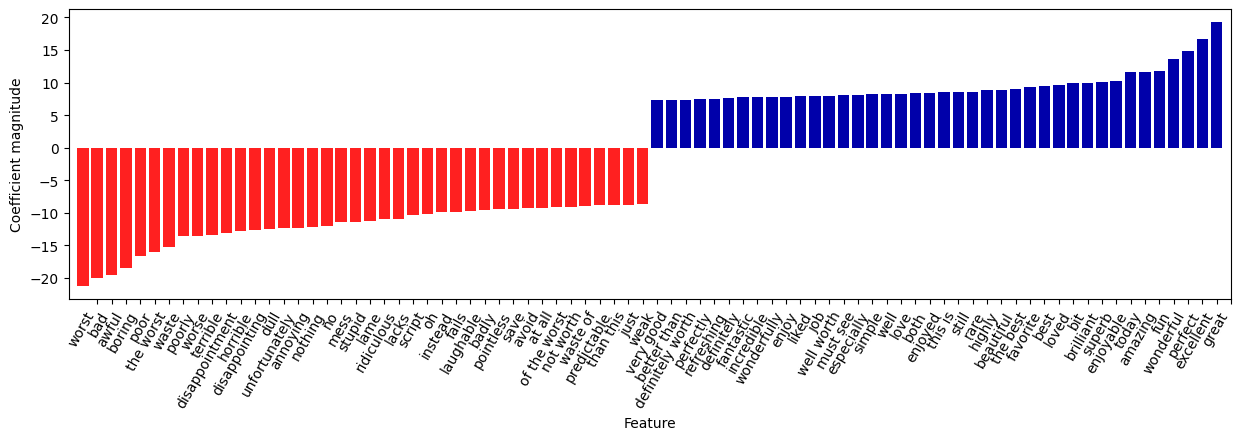

In [54]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names_out())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)
plt.xlim(-1, 80)
plt.show()

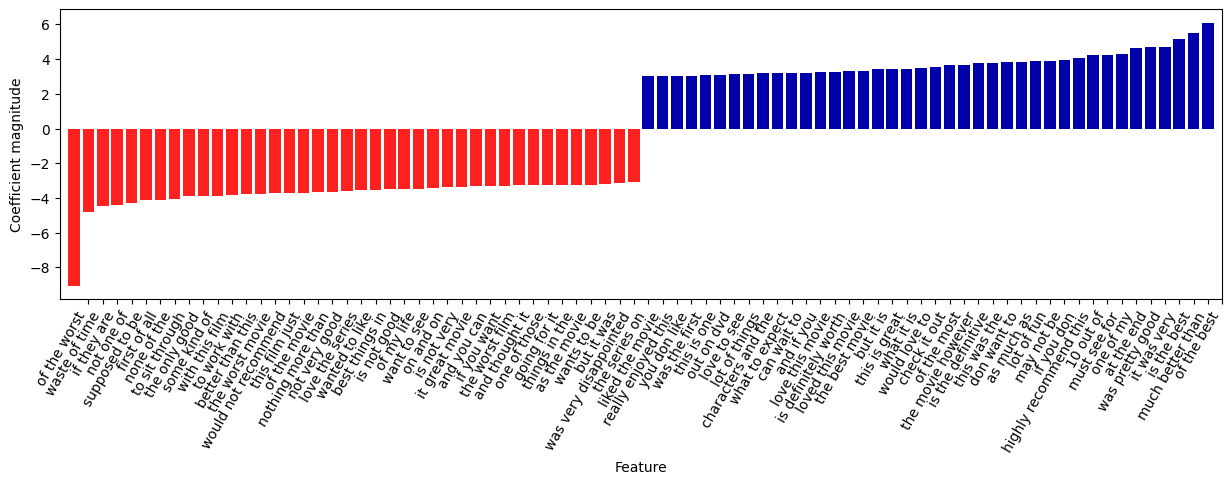

In [58]:
mask = np.array([len(feature.split(' ')) for feature in feature_names]) == 3
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask],
                                     n_top_features=40)
plt.xlim(-1, 80)
plt.show()

许多有用
的二元分词和三元分词都由常见的单词组成，这些单词本身可能没有什么信息量，比如
"none of the"（没有一个）、"the only good"（唯一好的）、"on and on"（不停地）、"this
is one"（这是一部）、"of the most"（最）等短语中的单词。但是，与一元分词特征的重
要性相比，这些特征的影响非常有限。回归系数的绝对值相比一元分词小很多。

## 高级分词、词干提取与词形还原

为了更好地理解标准化，我们来对比一种词干提取方法（Porter 词干提取器，一种广泛使
用的启发法集合，从 nltk 包导入）与 spacy 包中实现的词形还原：

In [74]:
en_nlp = spacy.load('en_core_web_sm')
stemmer = nltk.stem.PorterStemmer()

def compare_normalization(doc):
    doc_spacy = en_nlp(doc)
    print('lemmatization:')
    print([token.lemma_ for token in doc_spacy])
    print('Stemming:')
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [75]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                      "I'm scared of meeting the clients tomorrow.")

lemmatization:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'I', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


词干提取总是局限于将单词简化成词干，因此 "was" 变成了 "wa"，而词形还原可以得到正确的动词基本词形 "be"。同样，词形还原可以将 "worse" 标准化为 "bad"，而词干提取得到的是 "wors"。另一个主要区别在于，词干提取将两处 "meeting" 都简化为 "meet"。利用词形还原，第一处 "meeting" 被认为是名词，所以没有变化，而第二处 "meeting" 被认为是动词，所以变为 "meet"。一般来说，词形还原是一个比词干提取更复杂的过程，但用于机器学习的词例标准化时通常可以给出比词干提取更好的结果。

In [95]:
import re
regexp = re.compile('(?u)\\b\\w\\w+\\b')
en_nlp = spacy.load('en_core_web_sm')
old_tokenizer = en_nlp.tokenizer
# en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(regexp.findall(string))
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
    regexp.findall(string))

def customer_tokenizer(document):
    doc_spacy = en_nlp(document, disable=['parser', 'ner'])
    return [token.lemma_ for token in doc_spacy]

lemma_vect = CountVectorizer(tokenizer=customer_tokenizer, min_df=5)

In [111]:
import re
# regexp used in CountVectorizer:
regexp = re.compile('(?u)\\b\\w\\w+\\b')
# load spacy language model
en_nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
old_tokenizer = en_nlp.tokenizer
# replace the tokenizer with the preceding regexp
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
    regexp.findall(string))

# create a custom tokenizer using the SpaCy document processing pipeline
# (now using our own tokenizer)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# define a count vectorizer with the custom tokenizer
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [112]:
X_train_lemma = lemma_vect.fit_transform(text_train)
print('X_train_lemma.shape: {}'.format(X_train_lemma.shape))

AttributeError: 'spacy.tokenizer.Tokenizer' object has no attribute 'tokens_from_list'

## 主题建模与文档聚类

### 隐含狄利克雷分布

In [114]:
vect = CountVectorizer(max_features=10_000, max_df=.15)
X = vect.fit_transform(text_train)

In [118]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method='batch',
                                max_iter=25, random_state=0, n_jobs=-1)
document_topics = lda.fit_transform(X)

In [119]:
lda.components_.shape

(10, 10000)

In [126]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5,n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         guy           series        saw           
family        us            comedy        episode       am            
real          american      worst         tv            thought       
beautiful     our           thing         episodes      watched       
both          documentary   re            shows         got           
us            history       stupid        season        book          
each          years         actually      new           now           
work          new           want          musical       10            
performance   human         nothing       years         read          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
acti

从重要的单词来看，主题 1 似乎是关于历史和战争的电影，主题 2 可能是关于糟糕的喜剧，主题 3 可能是关于电视连续剧，主题 4 可能提取了一些非常常见的单词，而主题 6 似乎是关于儿童电影，主题 8 似乎提取了与获奖相关的评论。仅使用 10 个主题，每个主题都需要非常宽泛，才能共同涵盖我们的数据集中所有不同类型的评论。

In [131]:
from sklearn.decomposition import LatentDirichletAllocation
lda_100 = LatentDirichletAllocation(n_components=100, learning_method='batch',
                                    max_iter=25, random_state=0, n_jobs=-1)
document_topics_100 = lda_100.fit_transform(X)

In [133]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])
sorting = np.argsort(lda_100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=7, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      topic 36      topic 37      
--------      --------      --------      --------      --------      --------      --------      
zombie        worst         young         woman         beautiful     play          page          
zombies       money         us            gets          scenery       performance   fu            
dead          waste         our           wife          grey          role          lynch         
george        awful         hitler        house         before        actor         kung          
johnny        want          world         home          between       actors        silent        
scooby        nothing       family        girl          spanish       cast          bettie        
doo           thing         years         goes          each          director      chaplin       
bat           didn          true          husband       scottish      performances  davies        
scientist 

In [135]:
superman = np.argsort(document_topics[:, 45])[::-1]
for i in superman[:10]:
    print(b'.'.join(text_train[i].split(b'.')[:2]) + b'.\n')

b'Delightful film directed by some of the best directors in the industry today. The film is also casting some of the great actors of our time, not just from France but from everywhere.\n'
b'Fairly funny Jim Carrey vehicle that has him as a News reporter who temporarily gets the power of God and wrecks havoc. Carrey is back in familiar ground here and looks to be having a good time, and Jennifer Aniston as his put upon girlfriend is also charming and affecting.\n'
b'Busy Phillips put in one hell of a performance, both comedic and dramatic. Erika Christensen was good but Busy stole the show.\n'
b"`Bruce Almighty' will sweep the Academy Awards with a record 14 Oscar wins! It will surpass `Titanic' as the highest grossing film of all time! Jim Carrey's illustriousness will be at such a supreme level that he will announce his presidential candidacy for the 2004 White House playoffs. Almighty then! These grandeur fantasies would only transpire if the filmmakers (Carrey included) would posses

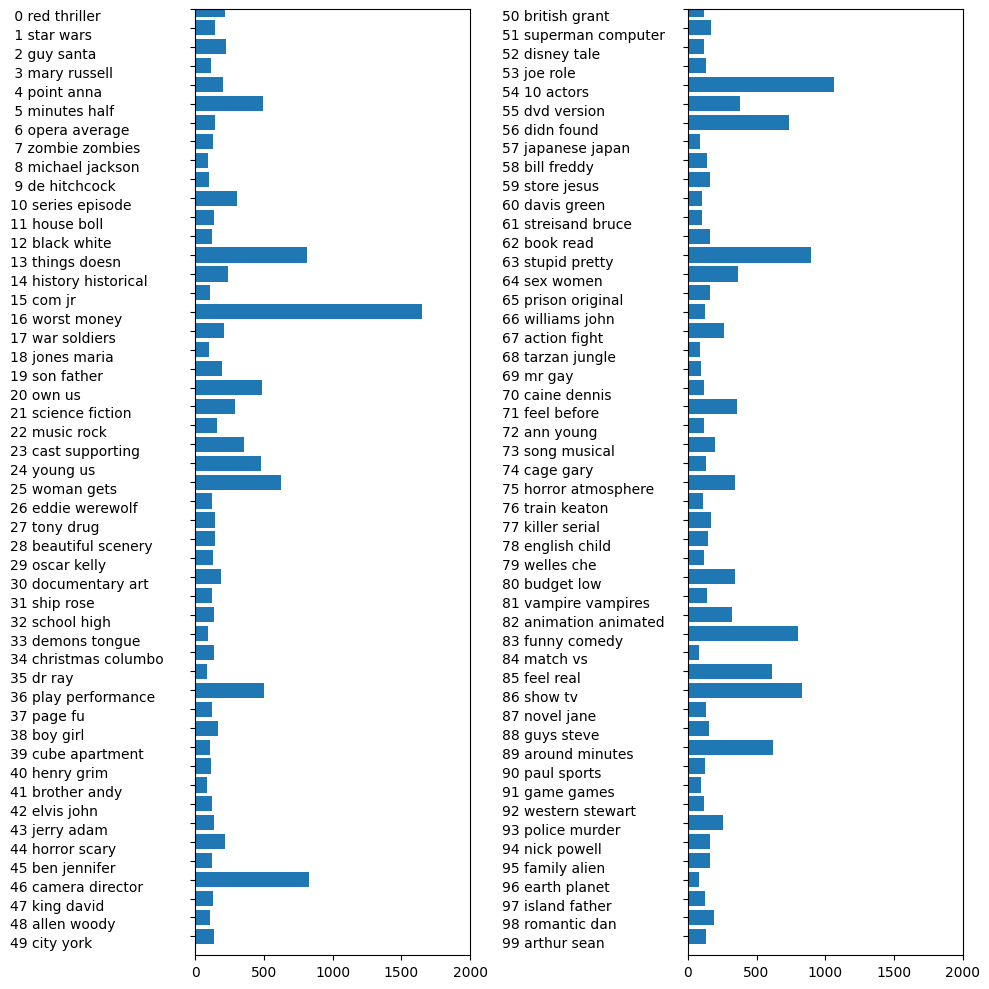

In [148]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ['{:>2} '.format(i) + ' '.join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics_100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha='left', va='top')
    ax[col].set_ylim(0, 50)
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

In [140]:
document_topics_100.shape

(25000, 100)